<a href="https://colab.research.google.com/github/sadat1971/Deep_Learning_NLP/blob/main/imdb_classification_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making a good baseline model 

From [tensorflow website](https://www.tensorflow.org/hub/tutorials/tf2_text_classification) 

This notebook classifies movie reviews as positive or negative using the text of the review. This is an example of binary—or two-class—classification, an important and widely applicable kind of machine learning problem.

We'll use the IMDB dataset that contains the text of 50,000 movie reviews from the Internet Movie Database. These are split into 25,000 reviews for training and 25,000 reviews for testing. The training and testing sets are balanced, meaning they contain an equal number of positive and negative reviews.

In [27]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.3.0
Eager mode:  True
Hub version:  0.10.0
GPU is NOT AVAILABLE


Let's download the dataset from tfds. The current version of the split is set in a 50%-50% way. Not ideal, but for now, we will deal with that. 

In [28]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Now, let's try to explore how the training and the test set data looks like:

In [29]:
print(train_examples)
print('\n\n')
print("Number of examples in the training data are:" + str(len(train_examples)))

#How many of the training examples are positive
print("Number of training data which are positive is," +str(np.sum(train_labels)) + "And they are " + str(np.sum(train_labels)*100/len(train_labels)) + "% of the total data")

print('\n\n')
print("Number of examples in the test data are:" + str(len(test_examples)))

#How many of the test examples are positive
print("Number of test data which are positive is," +str(np.sum(test_labels)) + "And they are " + str(np.sum(test_labels)*100/len(test_labels)) + "% of the total data")

[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

# convert sentences into embeddings vectors

We want to embed the sentences into vector representations. 

In [32]:
# This is an example of how sentences are converted to vectors
embed = hub.load("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")
embeddings = embed(["cat is on the mat", "dog is in the fog"])
embeddings

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 0.8666395 ,  0.35917717,  0.00579667,  0.681002  , -0.54226625,
         0.22343189, -0.38796625,  0.62195706,  0.22117122, -0.48538068,
        -1.2674141 ,  0.886369  , -0.32849073, -0.13924702, -0.53327686,
         0.5739708 , -0.05905761,  0.13629246, -1.1718255 , -0.31494334],
       [ 0.9602181 ,  0.62520486,  0.06261905,  0.37425604,  0.24782333,
        -0.39351934, -0.7418429 ,  0.56599647, -0.26197797, -0.69016844,
        -0.76565284,  0.71412426, -0.4537978 , -0.50701594, -0.8499377 ,
         0.8917156 , -0.30278975,  0.2149126 , -1.1098894 , -0.46719775]],
      dtype=float32)>

In [30]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples[:7])

<tf.Tensor: shape=(7, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ],
       [ 0.71152234, -0.6353217 ,  1.7385626 , -1.1168286 , -0.5451594 ,
        -1.1808156 ,  0.09504455,  1.4653089 ,  0.66059524,  0.79308075,
        -2.2268345 ,  0.07446612, -1.4075904 , -0.70645386, -1.907037  ,
         1.4419787 ,  1.9551861 , -0.42660055, -2.8022065 ,  0.43727064],
       [ 1.5165    , -0.71034056,  1.8556767 , -1.2033532 , -1.3105817 ,

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 0.8666395 ,  0.35917717,  0.00579667,  0.681002  , -0.54226625,
         0.22343189, -0.38796625,  0.62195706,  0.22117122, -0.48538068,
        -1.2674141 ,  0.886369  , -0.32849073, -0.13924702, -0.53327686,
         0.5739708 , -0.05905761,  0.13629246, -1.1718255 , -0.31494334],
       [ 0.9602181 ,  0.62520486,  0.06261905,  0.37425604,  0.24782333,
        -0.39351934, -0.7418429 ,  0.56599647, -0.26197797, -0.69016844,
        -0.76565284,  0.71412426, -0.4537978 , -0.50701594, -0.8499377 ,
         0.8917156 , -0.30278975,  0.2149126 , -1.1098894 , -0.46719775]],
      dtype=float32)>

# Building the model

In [33]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

# Building a validation set

In [35]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

# Model Training

In [37]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=2)

Epoch 1/40
30/30 - 2s - loss: 1.0796 - accuracy: 0.4895 - val_loss: 0.7219 - val_accuracy: 0.4833
Epoch 2/40
30/30 - 2s - loss: 0.6833 - accuracy: 0.5694 - val_loss: 0.6586 - val_accuracy: 0.6141
Epoch 3/40
30/30 - 2s - loss: 0.6397 - accuracy: 0.6418 - val_loss: 0.6354 - val_accuracy: 0.6428
Epoch 4/40
30/30 - 2s - loss: 0.6159 - accuracy: 0.6675 - val_loss: 0.6169 - val_accuracy: 0.6639
Epoch 5/40
30/30 - 2s - loss: 0.5931 - accuracy: 0.6879 - val_loss: 0.5976 - val_accuracy: 0.6822
Epoch 6/40
30/30 - 2s - loss: 0.5685 - accuracy: 0.7067 - val_loss: 0.5749 - val_accuracy: 0.6997
Epoch 7/40
30/30 - 2s - loss: 0.5400 - accuracy: 0.7319 - val_loss: 0.5498 - val_accuracy: 0.7217
Epoch 8/40
30/30 - 2s - loss: 0.5083 - accuracy: 0.7569 - val_loss: 0.5218 - val_accuracy: 0.7433
Epoch 9/40
30/30 - 2s - loss: 0.4734 - accuracy: 0.7809 - val_loss: 0.4926 - val_accuracy: 0.7641
Epoch 10/40
30/30 - 2s - loss: 0.4380 - accuracy: 0.8065 - val_loss: 0.4645 - val_accuracy: 0.7820
Epoch 11/40
30/30 -

# Model Evaluation on Test Set

In [38]:
results = model.evaluate(test_data, test_labels)

print(results)

782/782 [==============================] - 5s 7ms/step - loss: 0.3975 - accuracy: 0.8560
[0.3975006639957428, 0.8560400009155273]


# Visualizing the performance

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

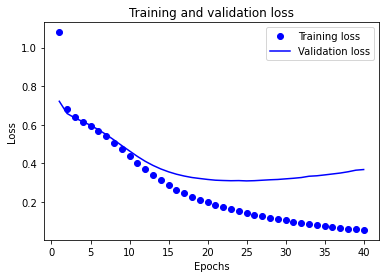

In [40]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()